In [1]:
import new_patch
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
path_model = 'C:\\Users\\alexi\\PROJET_3A\\Projet Adversarial Patch\\Project Adverserial Patch\\Collision Avoidance\\best_model_extended.pth'
path_dataset = 'C:\\Users\\alexi\\PROJET_3A\\Projet Adversarial Patch\\Project Adverserial Patch\\Collision Avoidance\\dataset'
path_calibration = 'C:\\Users\\alexi\\PROJET_3A\\projet_3A\\calibration\\'
path_distortion = 'C:\\Users\\alexi\\PROJET_3A\\projet_3A\\distortion\\distortion.so'
path_printable_vals = 'C:\\Users\\alexi\\PROJET_3A\\projet_3A\\printability\\printable_vals.dat'

c:\Users\alexi\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\alexi\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


iteration : 1 target proba : 0.00
iteration : 2 target proba : 0.00
iteration : 3 target proba : 0.01
iteration : 4 target proba : 0.01
iteration : 5 target proba : 0.02
iteration : 6 target proba : 0.02
iteration : 7 target proba : 0.01
iteration : 8 target proba : 0.04
iteration : 9 target proba : 0.05
iteration : 10 target proba : 0.00
iteration : 1 target proba : 0.00
iteration : 2 target proba : 0.00
iteration : 3 target proba : 0.00
iteration : 4 target proba : 0.00
iteration : 5 target proba : 0.00
iteration : 6 target proba : 0.00
iteration : 7 target proba : 0.00
iteration : 8 target proba : 0.00
iteration : 9 target proba : 0.00
iteration : 10 target proba : 0.00
iteration : 1 target proba : 0.00
iteration : 2 target proba : 0.00
iteration : 3 target proba : 0.00
iteration : 4 target proba : 0.00
iteration : 5 target proba : 0.00
iteration : 6 target proba : 0.00
iteration : 7 target proba : 0.01
iteration : 8 target proba : 0.01
iteration : 9 target proba : 0.01
iteration : 

KeyboardInterrupt: 

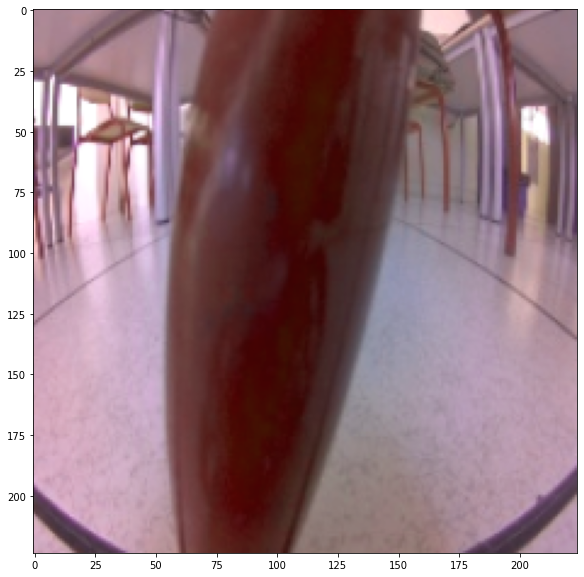

In [4]:
patch_trainer = new_patch.PatchTrainer(path_model, path_dataset, path_calibration, 
                                    path_distortion, path_printable_vals, lambda_target=1.5, 
                                    lambda_flee=1.5, validation=True, lambda_tv=0.1, 
                                    lambda_print=0.05, n_classes=2, 
                                    target_class=1, distort=True, 
                                    patch_relative_size=0.01, n_epochs=3)
patch_trainer.train_and_test()
patch_trainer.save_patch("test.patch")


sucess/total : 1/1 accuracy : 100.00
sucess/total : 1/2 accuracy : 50.00
sucess/total : 2/3 accuracy : 66.67
sucess/total : 3/4 accuracy : 75.00
sucess/total : 4/5 accuracy : 80.00
sucess/total : 5/6 accuracy : 83.33
sucess/total : 6/7 accuracy : 85.71
sucess/total : 7/8 accuracy : 87.50
sucess/total : 8/9 accuracy : 88.89
sucess/total : 8/10 accuracy : 80.00
sucess/total : 8/11 accuracy : 72.73
sucess/total : 9/12 accuracy : 75.00
sucess/total : 9/13 accuracy : 69.23
sucess/total : 9/14 accuracy : 64.29
sucess/total : 10/15 accuracy : 66.67
sucess/total : 11/16 accuracy : 68.75
sucess/total : 11/17 accuracy : 64.71
sucess/total : 12/18 accuracy : 66.67
sucess/total : 12/19 accuracy : 63.16
sucess/total : 12/20 accuracy : 60.00
sucess/total : 13/21 accuracy : 61.90
sucess/total : 14/22 accuracy : 63.64
sucess/total : 15/23 accuracy : 65.22
sucess/total : 16/24 accuracy : 66.67
sucess/total : 16/25 accuracy : 64.00
sucess/total : 16/26 accuracy : 61.54
sucess/total : 16/27 accuracy : 59

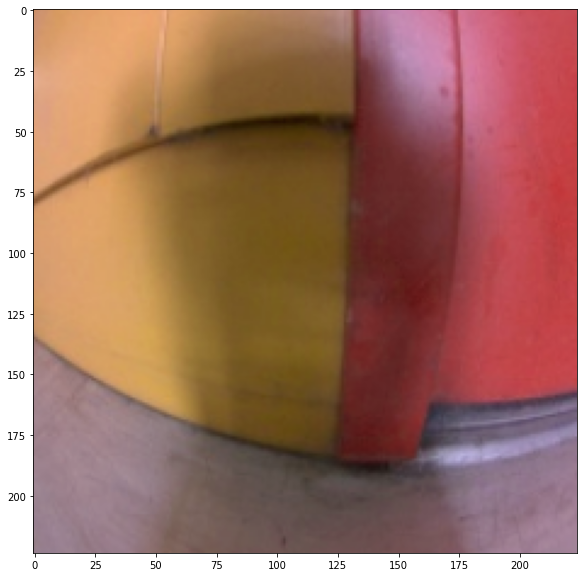

In [11]:
import pickle

patch_trainer = new_patch.PatchTrainer(path_model, path_dataset, path_calibration, 
                                    path_distortion, path_printable_vals, mode = 0, 
                                    lambda_target=1.5, lambda_flee=1.5,
                                    validation=True, lambda_tv=0.1, lambda_print=0.1,
                                    n_classes=2, target_class=1, distort=True, 
                                    patch_relative_size=0.05, n_epochs=3)

patch = pickle.load(open("patches/jetbot_5_mode2.patch", "rb"))
patch.model = patch_trainer.model
patch.train_loader = patch_trainer.train_loader
patch.test_loader = patch_trainer.test_loader
patch.distortion_tool = patch_trainer.distortion_tool
patch.printability_tool = patch_trainer.printability_tool
patch.test(-1, random=True)